<a href="https://colab.research.google.com/github/sancharichatterjee56/machinelearning/blob/main/gold_predictionsancharichatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Import the necessary module and class
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing

In [6]:
#loading the data into a csv file
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 rows in the dataframa
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns in dataset
gold_data.shape

(2290, 6)

In [9]:
#getting some basic information of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [17]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation
1.positive correlation
2.negative correlation

In [18]:
correlation = gold_data.corr(numeric_only=True) # add numeric_only argument

<Axes: >

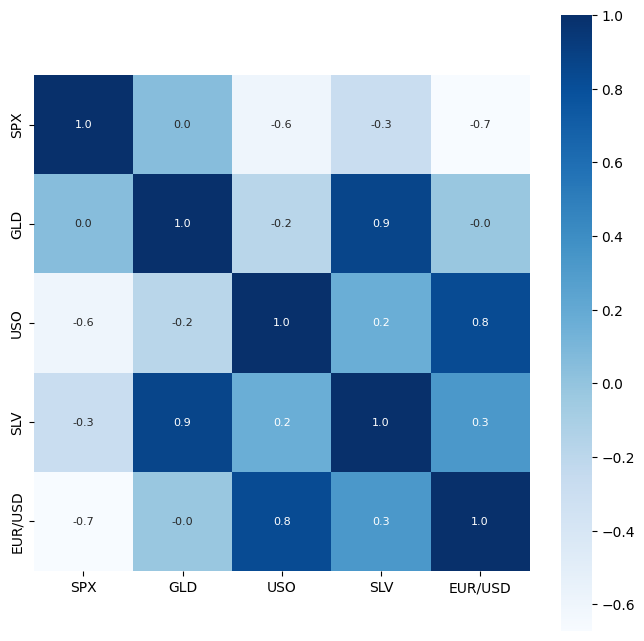

In [19]:
#constructing a heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#

In [20]:
#correlation values of gd
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


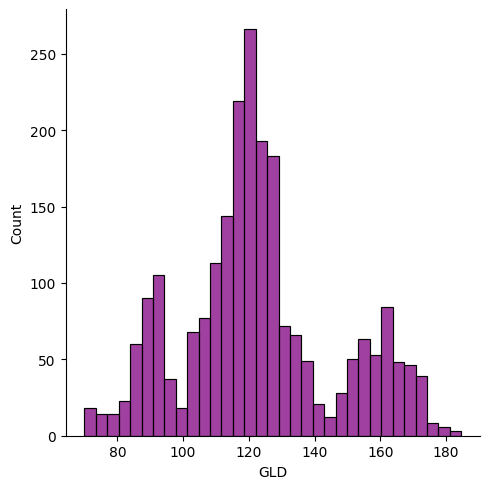

In [21]:
#checking the distribution of the gold price
sns.displot(gold_data['GLD'],color='purple')
#

splitting the features and target

In [22]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [23]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into train data and test data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

***model*** training random forest regressor


In [30]:
regressor=RandomForestRegressor(n_estimators=100)

In [32]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

model data evaluation

In [33]:

#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [34]:
print(test_data_prediction)

[168.74969929  82.20059963 115.85459979 127.6561011  120.83670118
 154.83659744 149.99309915 126.11380049 117.7016987  126.06890077
 116.6149012  171.98840041 141.81409841 167.58419803 115.23759996
 117.31280023 137.98670286 170.00230109 159.21340272 158.85089942
 155.14999963 125.5683002  175.99219915 157.50470308 125.1259006
  93.64559957  76.86429996 120.44140008 119.12659952 167.5367999
  88.3449999  125.27649961  91.23080109 117.67500052 121.21909958
 136.48000068 115.58660092 115.18070069 148.85520005 107.1404005
 104.24370233  87.21189795 126.41480051 117.92010015 153.33649857
 119.62739996 108.41390006 108.05849851  93.1435006  127.12009801
  75.73010004 113.63049916 121.1313004  111.33369956 118.79479878
 120.76619924 158.66090004 166.92230101 146.88059693  85.95949884
  94.34350012  86.88869869  90.52869996 118.89800063 126.42740046
 127.45760012 169.48320054 122.34269955 117.36199931  98.32730045
 168.57970155 143.44079822 131.36800283 121.19510207 121.40179933
 119.85000068

In [36]:

#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)
#

R squared error: 0.9893340489334991


compare the actual values and the predicted values

In [37]:
y_test=list(y_test)

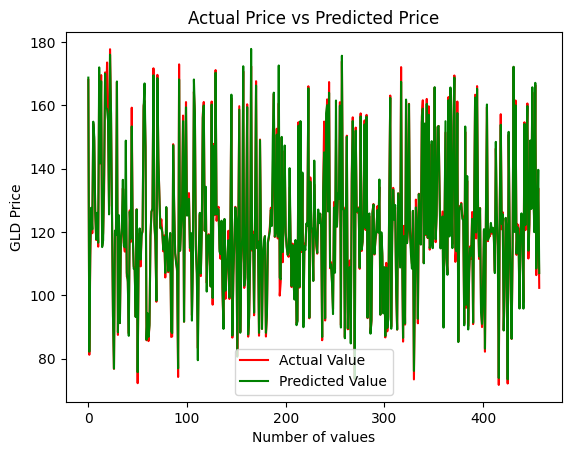

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

In [39]:
plt.plot(y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
plt.ylabel